In [1]:
%matplotlib_svg
import pandas as pd
import numpy as np
import pylab as pl
pd.set_option("display.show_dimensions", False)
pd.set_option("display.float_format", "{:4.2g}".format)
df_soil = pd.read_csv("data/Soils-simple.csv", index_col=[0, 1], usecols=range(6))

## 数值运算函数

In [2]:
print(df_soil)

                   pH  Dens   Ca  Conduc
Depth Contour                           
0-10  Depression  5.4  0.98   11     1.5
      Slope       5.5   1.1   12       2
      Top         5.3     1   13     1.4
10-30 Depression  4.9   1.4  7.5     5.5
      Slope       5.3   1.3  9.5     4.9
      Top         4.8   1.3   10     3.6


In [3]:
%C df_soil.mean(); df_soil.mean(axis=1); df_soil.mean(level=1)

df_soil.mean()    df_soil.mean(axis=1)          df_soil.mean(level=1)       
--------------  ------------------------  ----------------------------------
pH        5.2   Depth  Contour                         pH  Dens   Ca  Conduc
Dens      1.2   0-10   Depression    4.6  Contour                           
Ca         11          Slope         5.2  Depression  5.1   1.2  9.1     3.5
Conduc    3.1          Top           5.3  Slope       5.4   1.2   11     3.5
dtype: float64  10-30  Depression    4.8  Top         5.1   1.2   12     2.5
                       Slope         5.3                                    
                       Top             5                                    
                dtype: float64                                              


In [4]:
s = pd.Series(dict(Depression=0.9, Slope=1.2))
df_soil.Ca.mul(s, level=1, fill_value=1)

Depth  Contour   
0-10   Depression    9.6
       Slope          15
       Top            13
10-30  Depression    6.8
       Slope          11
       Top            10
dtype: float64

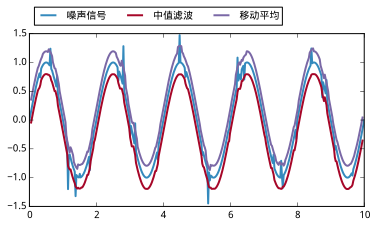

In [12]:
#%fig=中值滤波和移动平均
t = np.linspace(0, 10, 400)
x = np.sin(0.5*2*np.pi*t)
x[np.random.randint(0, len(t), 40)] += np.random.normal(0, 0.3, 40)
s = pd.Series(x, index=t)
s_mean = pd.rolling_mean(s, 5, center=True)
s_median = pd.rolling_median(s, 5, center=True)
#%hide
ax = s.plot(label="噪声信号")
(s_median - 0.2).plot(ax=ax, label="中值滤波")
(s_mean + 0.2).plot(ax=ax, label="移动平均")
ax.legend(loc="best", ncol=3, bbox_to_anchor=(0., 1.02, 1., .102));

> **QUESTION**

> 请读者思考如何使用NumPy提供的ufunc函数计算`ref:fig-next`中的三条曲线。

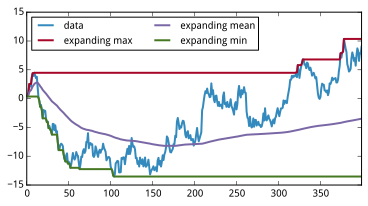

In [10]:
#%fig=用`expanding_*`计算历史最大值、平均值、最小值
np.random.seed(42)
x = np.cumsum(np.random.randn(400))
x_max = pd.expanding_max(x)
x_min = pd.expanding_min(x)
x_mean = pd.expanding_mean(x)
#%hide
df = pd.DataFrame(np.c_[x, x_max, x_mean, x_min], 
                  columns=["data", "expanding max", "expanding mean", "expanding min"])
ax = df.plot()
ax.legend(ncol=2, loc="upper left");